## Import packages and libraries

In [6]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

%matplotlib inline

### Define functions for loading images

In [45]:
# Collect image file paths
def original_image_paths ():
    folder = 'images/original'
    files = os.listdir(folder)
    files.sort()
    files = ['{}/{}'.format(folder, file) for file in files]
    return files

# Load the images into a numpy array
def np_read_images(img_file_paths):
    X_data = []

    for index, file_path in enumerate(img_file_paths):
        img = mpimg.imread(file_path) 
        X_data.append(img)

#     X_data = np.array(X_data, dtype = np.float32) # Convert to numpy
    return X_data

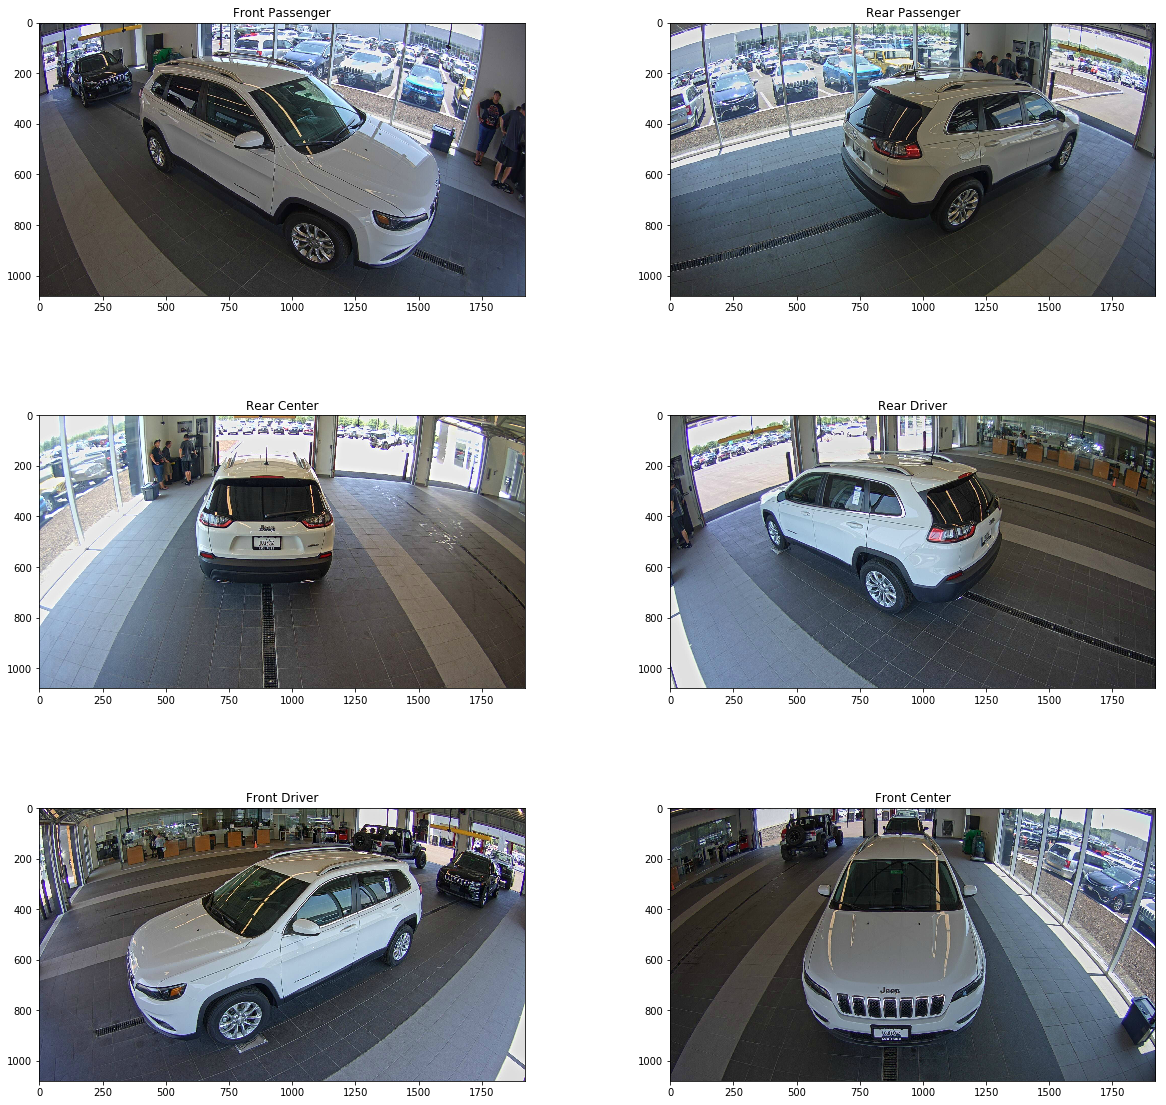

In [65]:
# Display the vehicles in a grid
vehicle_paths = get_original_images()
vehicle_images = np_read_images(vehicle_paths)

gs = gridspec.GridSpec(3, 2)
gs.update(wspace = 0.30, hspace = 0.30)

fig, ax = plt.subplots(figsize = (20, 20))
# Front Passenger
plt.subplot(gs[0])
plt.imshow(vehicle_images[0])
plt.title('Front Passenger')
# Rear Passenger
plt.subplot(gs[1])
plt.imshow(vehicle_images[1])
plt.title('Rear Passenger')
# Rear Center
plt.subplot(gs[2])
plt.imshow(vehicle_images[2])
plt.title('Rear Center')
# Rear Driver
plt.subplot(gs[3])
plt.imshow(vehicle_images[3])
plt.title('Rear Driver')
# Front Driver
plt.subplot(gs[4])
plt.imshow(vehicle_images[4])
plt.title('Front Driver')
# Front Driver
plt.subplot(gs[5])
plt.imshow(vehicle_images[5])
plt.title('Front Center')
plt.show()

## OpenCV Image Analysis

In [66]:
print(cv2.__version__)

3.4.2


### Image Gradients - Sobel and Scharr, Laplacian Derivatives

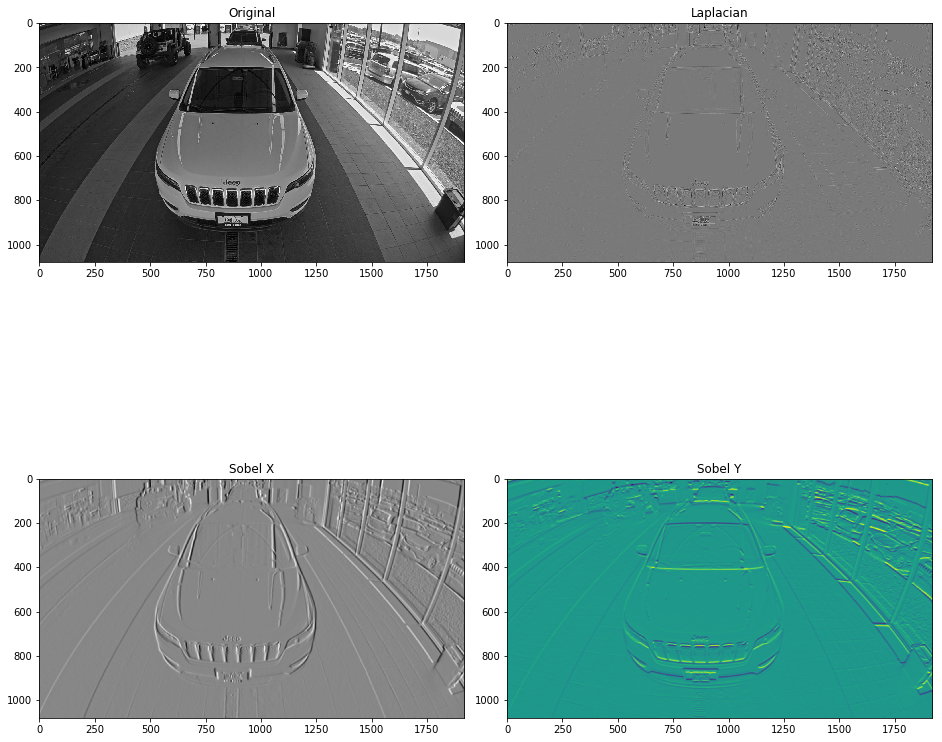

In [16]:
# Front Passenger

img = cv2.imread('./images/original/1C4PJLCX8KD22313106.jpeg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0, ksize=31)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1, ksize=31)

gs = gridspec.GridSpec(2, 2)
gs.update(wspace = 0.10, hspace = 0.10)

fig, ax = plt.subplots(figsize = (16, 16))

plt.subplot(gs[0])
plt.imshow(img, cmap = 'gray')
plt.title('Original')
plt.subplot(gs[1])
plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian')
plt.subplot(gs[2])
plt.imshow(sobelx, cmap = 'gray')
plt.title('Sobel X')
plt.subplot(gs[3])
plt.imshow(sobely, cmap = 'viridis')
plt.title('Sobel Y')

plt.show()

### Canny Edge Detection
OpenCV puts all the above in single function, cv2.Canny(). We will see how to use it. First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. Last argument is L2gradient which specifies the equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this 

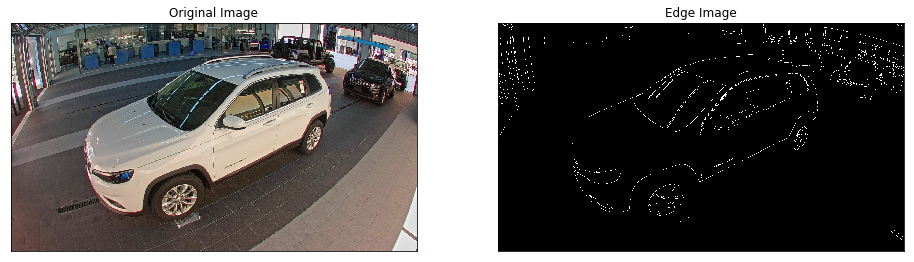

In [103]:
img = cv2.imread('./images/original/1C4PJLCX8KD22313105.jpeg')
edges = cv2.Canny(img, 800, 400, True)
fig, ax = plt.subplots(figsize = (16, 16))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### Interactive Foreground Extraction using GrabCut Algorithm

[GrabCut algorithm](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_grabcut/py_grabcut.html#grabcut)

Now we go for grabcut algorithm with OpenCV. OpenCV has the function, cv2.grabCut() for this. We will see its arguments first:

- *img* - Input image
- *mask* - It is a mask image where we specify which areas are background, foreground or probable background/foreground etc. It is done by the following flags, **cv2.GC_BGD, cv2.GC_FGD, cv2.GC_PR_BGD, cv2.GC_PR_FGD**, or simply pass 0,1,2,3 to image.
- *rect* - It is the coordinates of a rectangle which includes the foreground object in the format (x,y,w,h)
- *bdgModel, fgdModel* - These are arrays used by the algorithm internally. You just create two np.float64 type zero arrays of size (1,65).
- *iterCount* - Number of iterations the algorithm should run.
- *mode* - It should be **cv2.GC_INIT_WITH_RECT** or **cv2.GC_INIT_WITH_MASK** or combined which decides whether we are drawing rectangle or final touchup strokes.


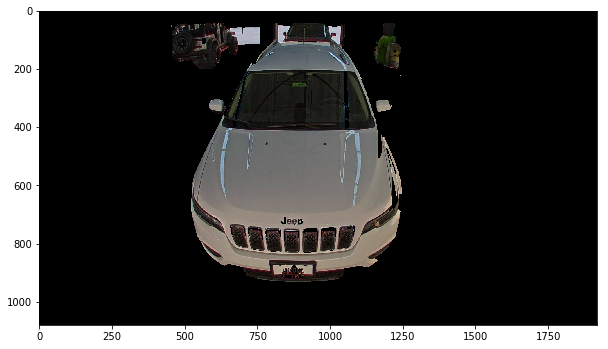

(<matplotlib.image.AxesImage at 0x11f6e7358>, None)

In [20]:
img = cv2.imread('./images/original/1C4PJLCX8KD22313106.jpeg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (450,40,800,900)
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

fig, ax = plt.subplots(figsize = (10, 10))

plt.imshow(img),plt.show()

In [4]:
import cv2
cv2.saliency

<module 'cv2.saliency'>

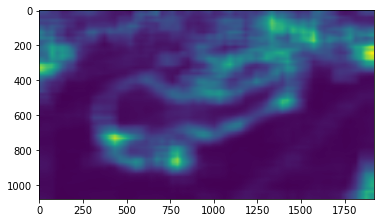

In [9]:
image = cv2.imread('./images/original/1C4PJLCX8KD22313105.jpeg')
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(image)
saliencyMap = (saliencyMap * 255).astype("uint8")
plt.imshow(saliencyMap)
plt.show()

Text(0.5,1,'Thresh')

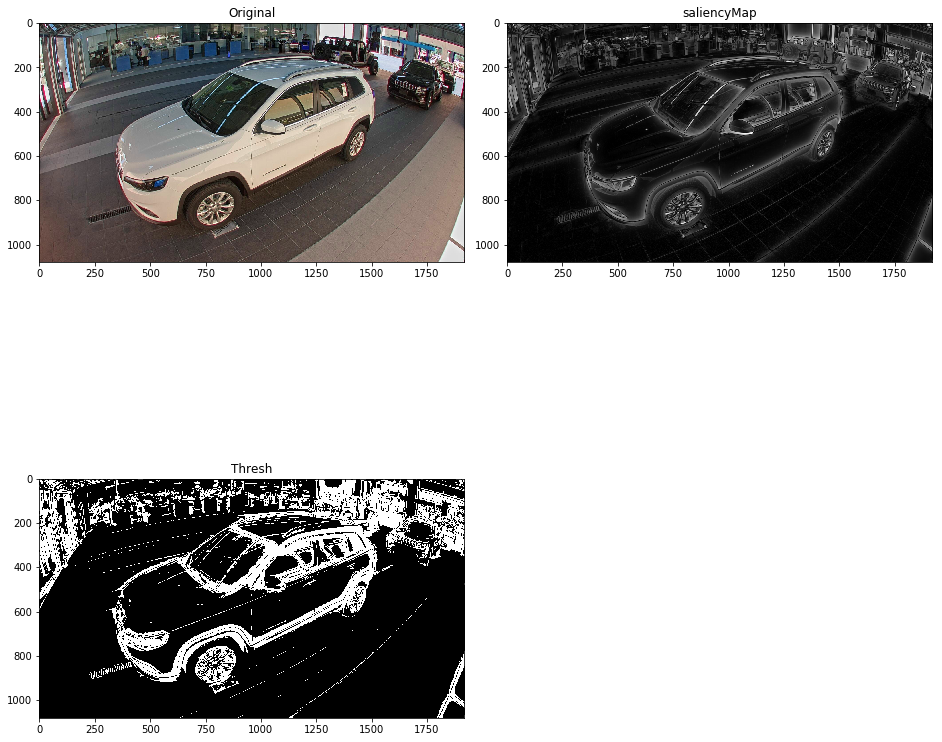

In [12]:
# initialize OpenCV's static fine grained saliency detector and
# compute the saliency map
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
(success, saliencyMap) = saliency.computeSaliency(image)
 
# if we would like a *binary* map that we could process for contours,
# compute convex hull's, extract bounding boxes, etc., we can
# additionally threshold the saliency map
threshMap = cv2.threshold(saliencyMap, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
 
gs = gridspec.GridSpec(2, 2)
gs.update(wspace = 0.10, hspace = 0.10)

fig, ax = plt.subplots(figsize = (16, 16))

plt.subplot(gs[0])
plt.imshow(image, cmap = 'gray')
plt.title('Original')
plt.subplot(gs[1])
plt.imshow(saliencyMap, cmap = 'gray')
plt.title('saliencyMap')
plt.subplot(gs[2])
plt.imshow(threshMap, cmap = 'gray')
plt.title('Thresh')

## scikit-image

In [117]:
from skimage.feature import hog
from skimage import data, exposure

/usr/local/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


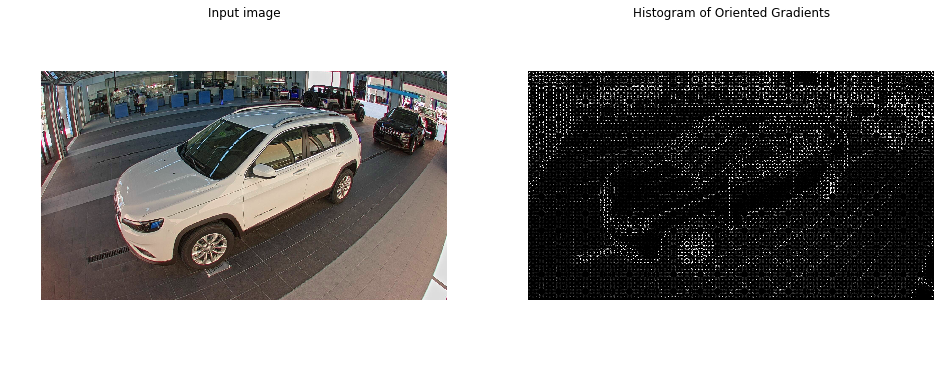

In [123]:
# The original image is inverted as the object must be white.
image = cv2.imread('./images/original/1C4PJLCX8KD22313105.jpeg')

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


In [134]:
from skimage import io as skio
url = './images/original/1C4PJLCX8KD22313105.jpeg'
img = skio.imread(url, flatten=True)

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:54: UserWarning: `flatten` has been deprecated in favor of `as_gray` and will be removed in v0.16.
  warn('`flatten` has been deprecated in favor of `as_gray`'


In [135]:
print("shape of image: {}".format(img.shape))
print("dtype of image: {}".format(img.dtype))

shape of image: (1080, 1920)
dtype of image: float64


In [136]:
from skimage import filters
sobel = filters.sobel(img)

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 200

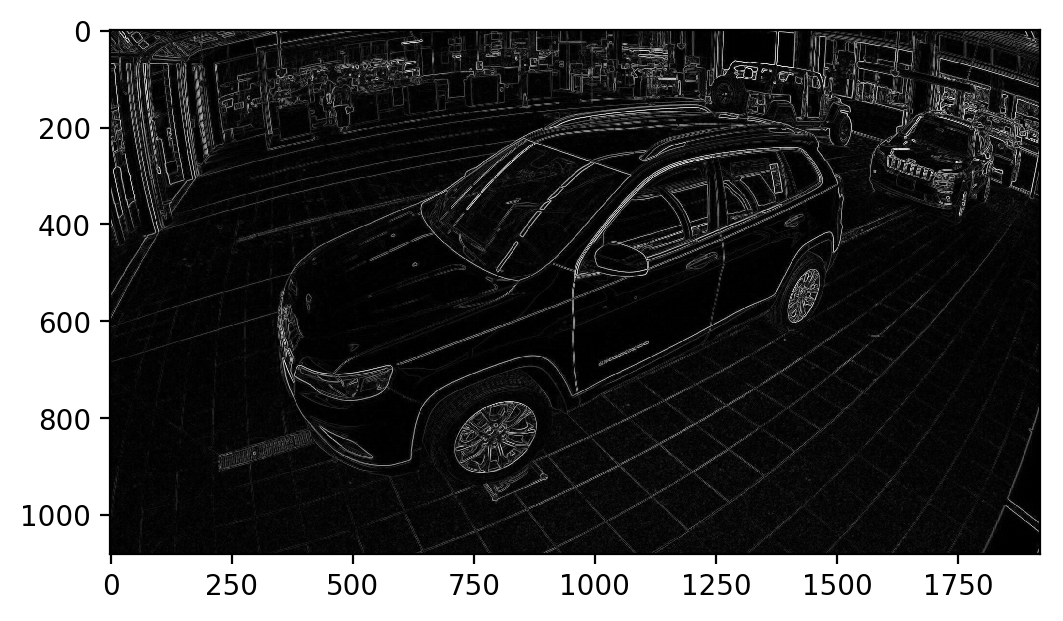

In [138]:
plt.imshow(sobel)

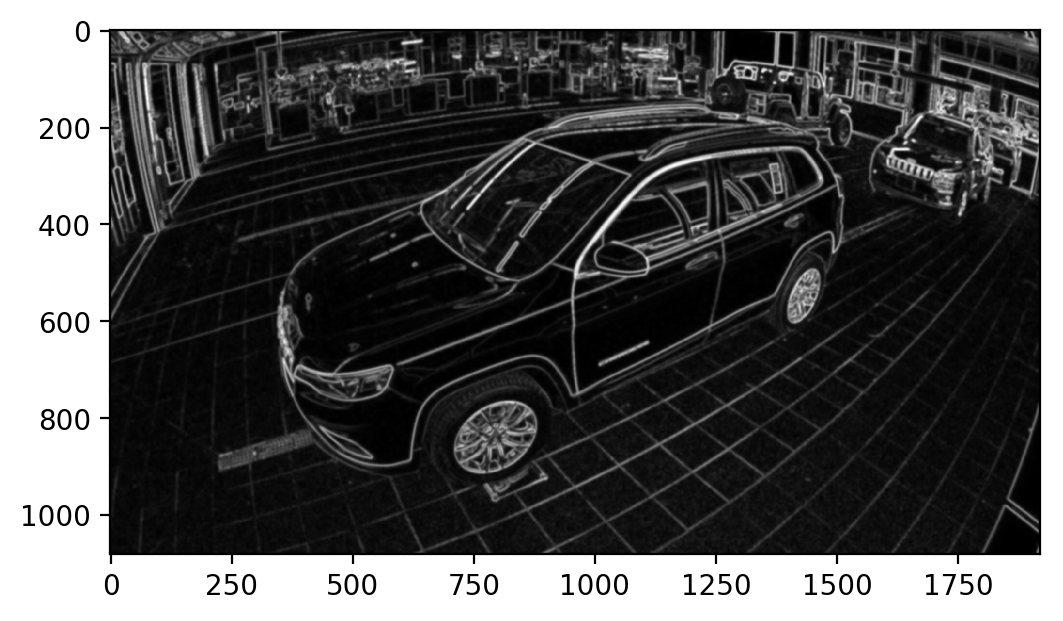

In [139]:
blurred = filters.gaussian(sobel, sigma=2.0)
plt.imshow(blurred)

In [140]:
import numpy as np
light_spots = np.array((img > 245).nonzero()).T

In [141]:
light_spots.shape

(0, 2)

Text(0.5,1,'light spots in image')

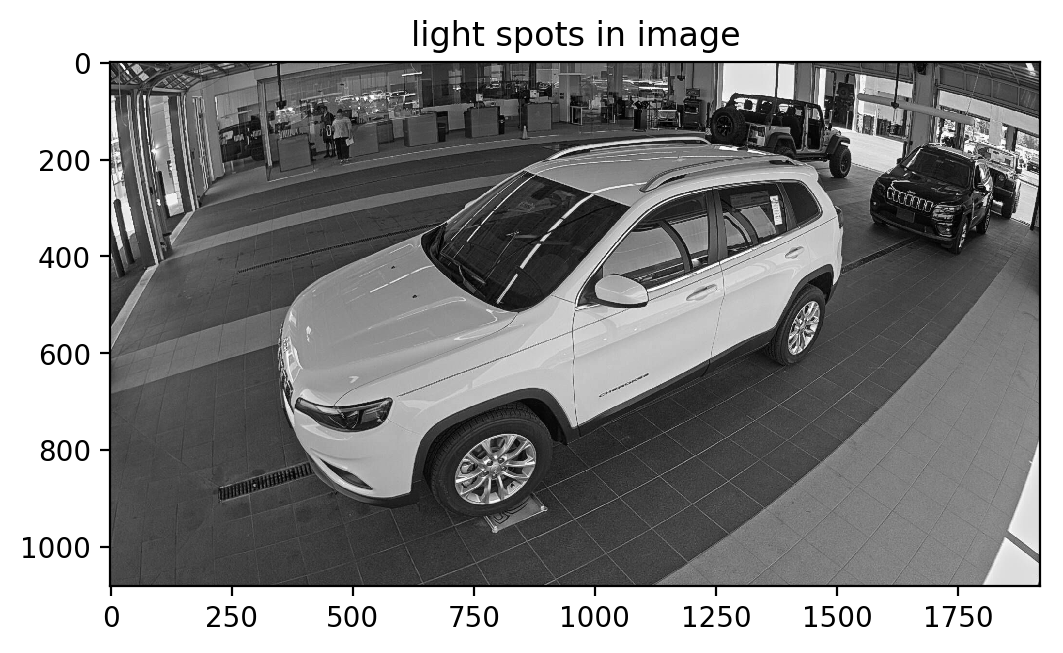

In [142]:
plt.plot(light_spots[:, 1], light_spots[:, 0], 'o')
plt.imshow(img)
plt.title('light spots in image')

In [143]:
dark_spots = np.array((img < 3).nonzero()).T

In [144]:
dark_spots.shape


(2073600, 2)

Text(0.5,1,'dark spots in image')

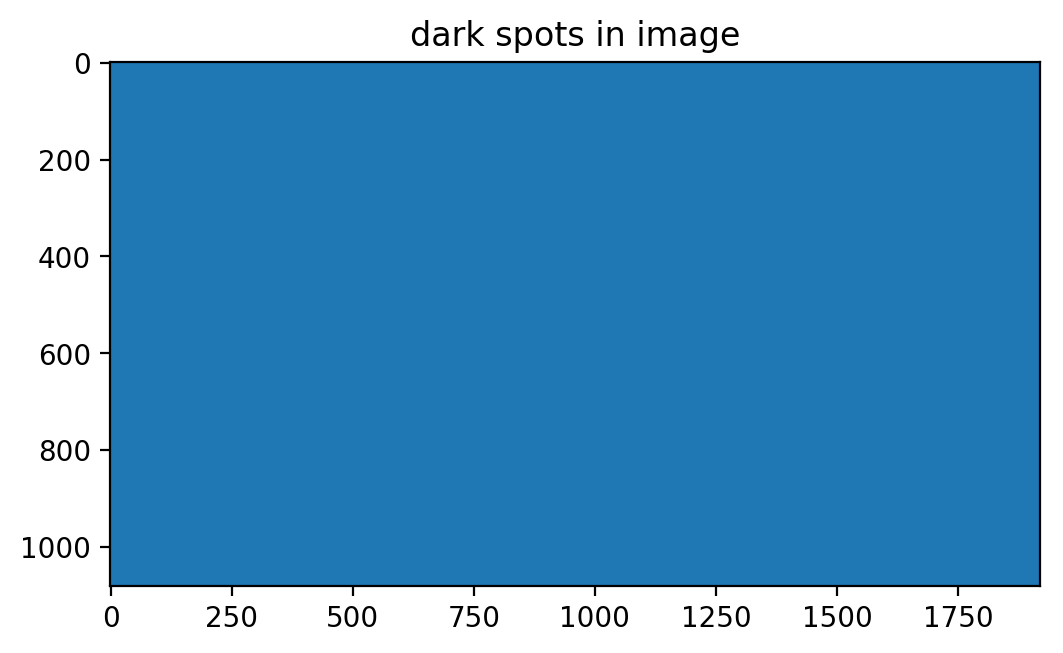

In [145]:
plt.plot(dark_spots[:, 1], dark_spots[:, 0], 'o')
plt.imshow(img)
plt.title('dark spots in image')

### Making a seed mask

In [146]:
from scipy import ndimage as ndi
bool_mask = np.zeros(img.shape, dtype=np.bool)
bool_mask[tuple(light_spots.T)] = True
bool_mask[tuple(dark_spots.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)
num_seeds

1

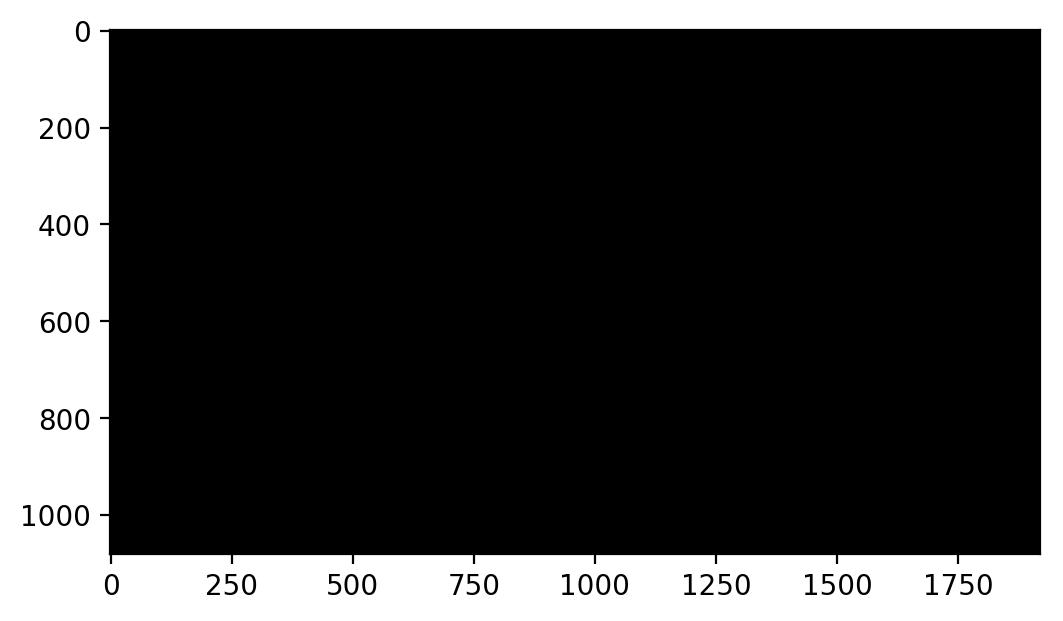

In [147]:
from skimage import morphology
ws = morphology.watershed(blurred, seed_mask)
plt.imshow(ws)

In [148]:
background = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))
background

1

In [149]:
background_mask = (ws == background)

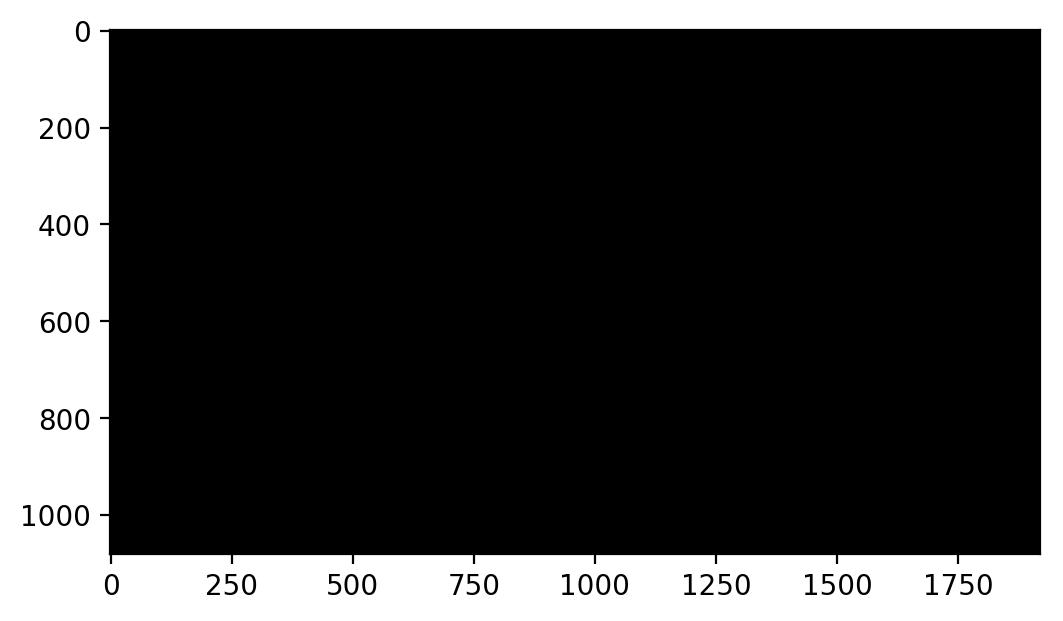

In [150]:
plt.imshow(~background_mask)

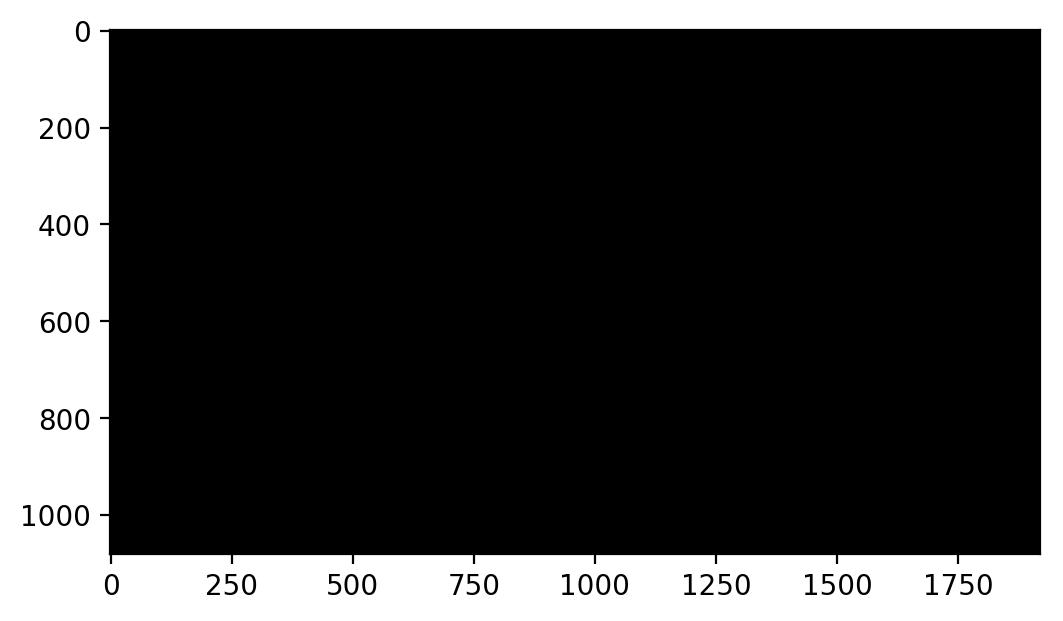

In [160]:
cleaned = img * ~background_mask
plt.imshow(cleaned)

In [152]:
plt.imshow(cleaned, cmap='gray')
plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11b7540d0> (for post_execute):


ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

In [153]:
def draw_group_as_background(ax, group, watershed_result, original_image):
    "Draws a group from the watershed result as red background."
    background_mask = (watershed_result == group)
    cleaned = original_image * ~background_mask
    ax.imshow(cleaned, cmap='gray')
    ax.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))


In [154]:
background_candidates = sorted(set(ws.ravel()), key=lambda g: np.sum(ws == g), reverse=True)


In [155]:
N = 3
fig, axes = plt.subplots(N, N, figsize=(6, 8))
for i in range(N*N):
    draw_group_as_background(axes.ravel()[i], background_candidates[i], ws, img)
plt.tight_layout()

IndexError: list index out of range

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11b7540d0> (for post_execute):


ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

In [156]:
seed_mask = np.zeros(img.shape, dtype=np.int)
seed_mask[0, 0] = 1 # background
seed_mask[600, 400] = 2 # foreground

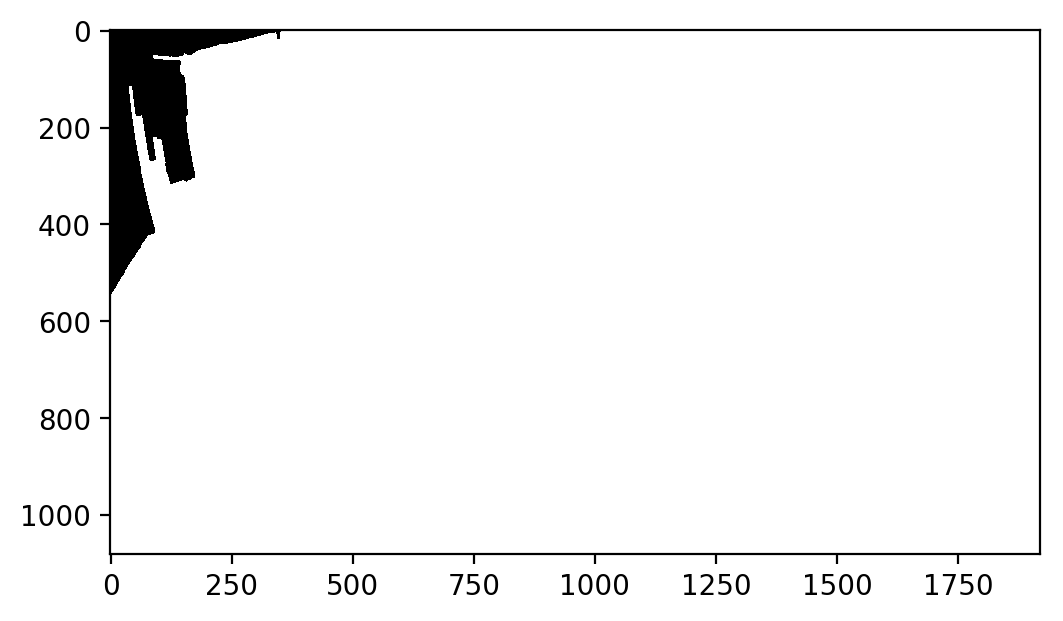

In [157]:
ws = morphology.watershed(blurred, seed_mask)
plt.imshow(ws)

In [159]:
fig, ax = plt.subplots()
draw_group_as_background(ax, 1, ws, img)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11b7540d0> (for post_execute):


ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64